<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import datasets


In [5]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df=pd.read_csv(breast_cancer_csv)

### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

In [7]:
df.head().T

0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9     130.0     77.58     135.1
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                 2019.0    1956.0    1709.0     567.7    1575.0
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN

In [8]:
df.tail().T

564       565       566       567       568
id                         926424    926682    926954    927241     92751
diagnosis                       M         M         M         M         B
radius_mean                 21.56     20.13      16.6      20.6      7.76
texture_mean                22.39     28.25     28.08     29.33     24.54
perimeter_mean              142.0     131.2     108.3     140.1     47.92
area_mean                  1479.0    1261.0     858.1    1265.0     181.0
smoothness_mean             0.111    0.0978   0.08455    0.1178   0.05263
compactness_mean           0.1159    0.1034    0.1023     0.277   0.04362
concavity_mean             0.2439     0.144   0.09251    0.3514       0.0
concave points_mean        0.1389   0.09791   0.05302     0.152       0.0
symmetry_mean              0.1726    0.1752     0.159    0.2397    0.1587
fractal_dimension_mean    0.05623   0.05533   0.05648   0.07016   0.05884
radius_se                   1.176    0.7655    0.4564     0.726    0.3857
texture_se                  1.256     2.463     1.075     1.595     1.428
perimeter_se                7.673     5.203     3.425     5.772     2.548
area_se                     158.7     99.04     48.55     86.22     19.15
smoothness_se              0.0103  0.005769  0.005903  0.006522  0.007189
compactness_se            0.02891   0.02423   0.03731   0.06158   0.00466
concavity_se              0.05198    0.0395    0.0473   0.07117       0.0
concave points_se         0.02454   0.01678   0.01557   0.01664       0.0
symmetry_se               0.01114   0.01898   0.01318   0.02324   0.02676
fractal_dimension_se     0.004239  0.002498  0.003892  0.006185  0.002783
radius_worst                25.45     23.69     18.98     25.74     9.456
texture_worst                26.4     38.25     34.12     39.42     30.37
perimeter_worst             166.1     155.0     126.7     184.6     59.16
area_worst                 2027.0    1731.0    1124.0    1821.0     268.6
smoothness_worst            0.141    0.1166    0.1139     0.165   0.08996
compactness_worst          0.2113    0.1922    0.3094    0.8681   0.06444
concavity_worst            0.4107    0.3215    0.3403    0.9387       0.0
concave points_worst       0.2216    0.1628    0.1418     0.265       0.0
symmetry_worst              0.206    0.2572    0.2218    0.4087    0.2871
fractal_dimension_worst   0.07115   0.06637    0.0782     0.124   0.07039
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [12]:
# drop 'unnamed' column
df.drop(['Unnamed: 32'], inplace=True, axis=1)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [13]:
print(df.diagnosis.value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [14]:
correlation = df.corr(numeric_only=True)

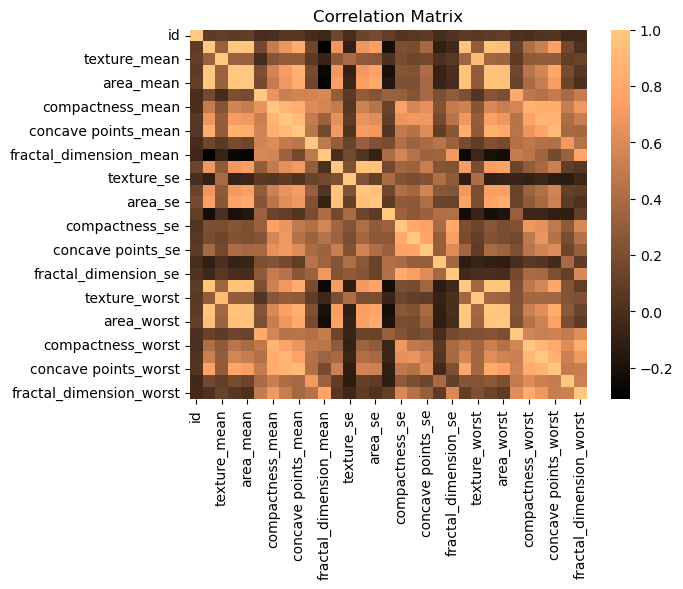

In [15]:
sns.heatmap(correlation, cmap='copper')
plt.title("Correlation Matrix")
plt.show()

In [16]:
bm_map = {
    'B': 0,
    'M': 1
}

df['diagnosis'] = df['diagnosis'].map(bm_map)
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

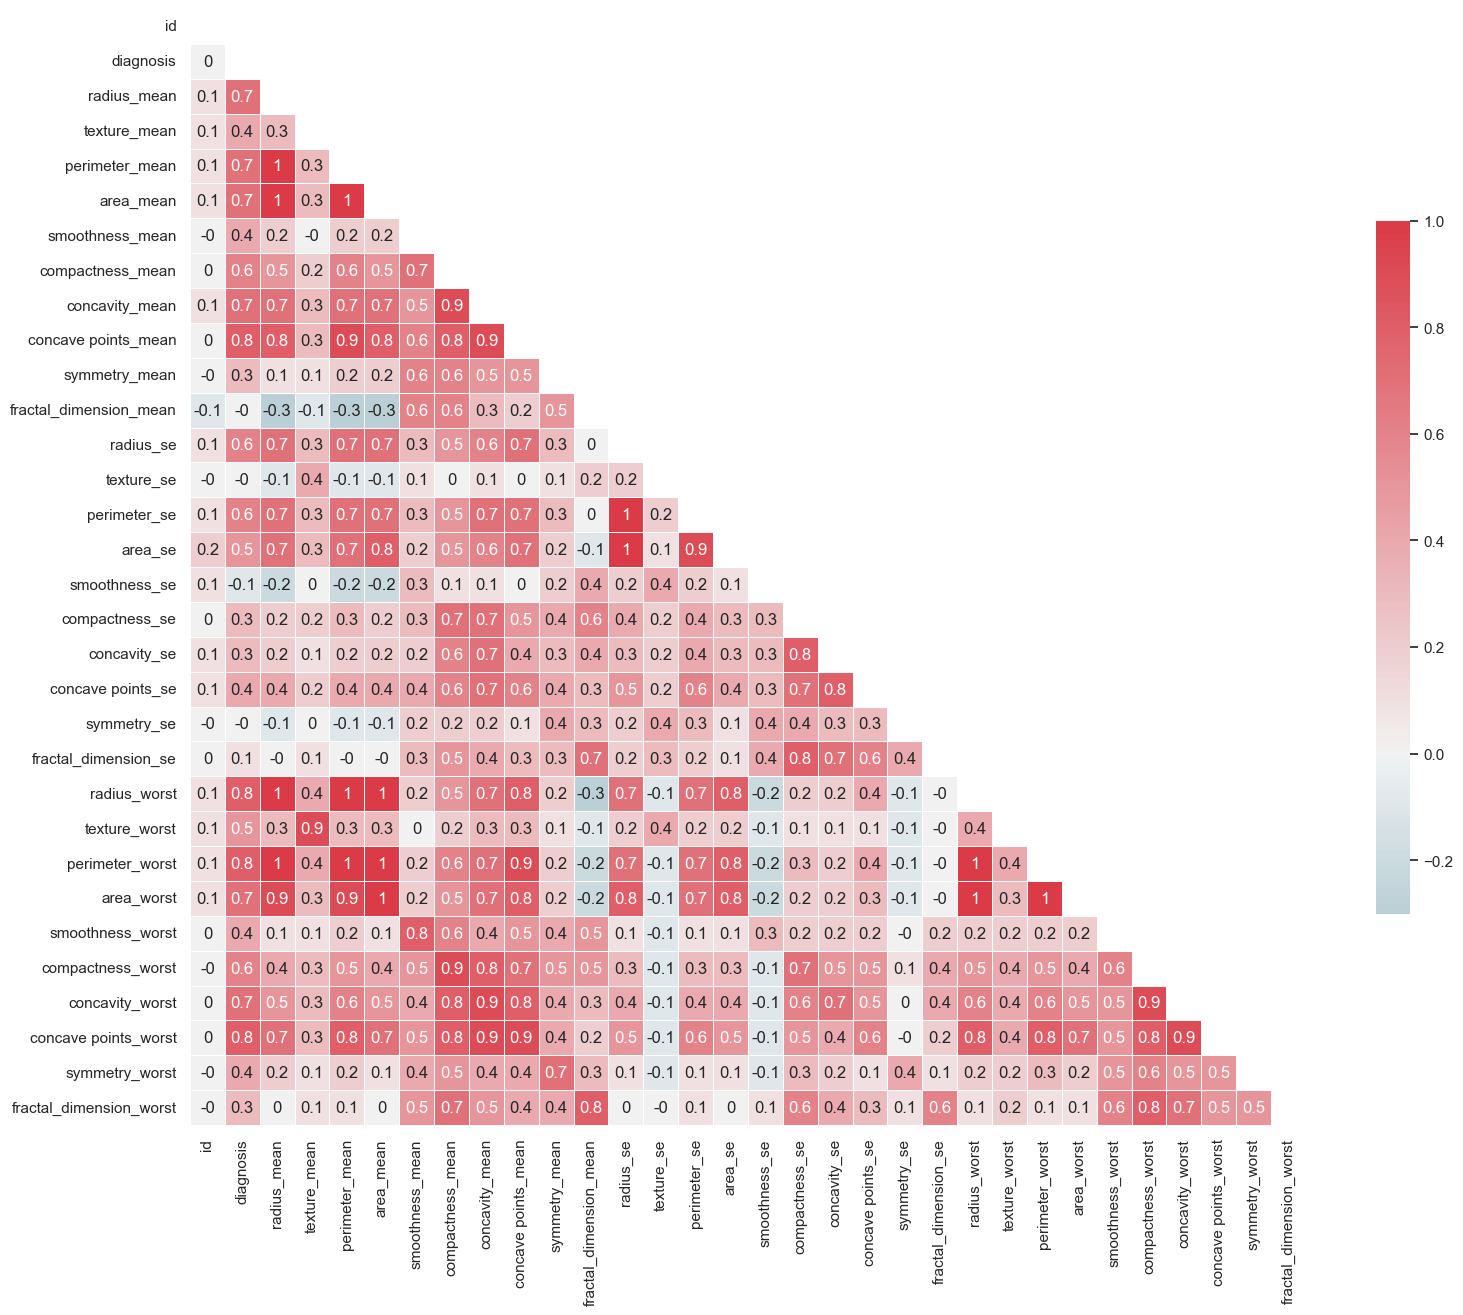

In [17]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr().round(1), mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [18]:
# Maybe take any features 0.5 and above (16)?
# Maybe also try 0.7 and above?

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [20]:
# This is with all features (as per previous lab)
# Define Target, Predictors

y = df["diagnosis"]
X= df.drop(columns="diagnosis")
X.head().T

0              1             2  \
id                       842302.000000  842517.000000  8.430090e+07   
radius_mean                  17.990000      20.570000  1.969000e+01   
texture_mean                 10.380000      17.770000  2.125000e+01   
perimeter_mean              122.800000     132.900000  1.300000e+02   
area_mean                  1001.000000    1326.000000  1.203000e+03   
smoothness_mean               0.118400       0.084740  1.096000e-01   
compactness_mean              0.277600       0.078640  1.599000e-01   
concavity_mean                0.300100       0.086900  1.974000e-01   
concave points_mean           0.147100       0.070170  1.279000e-01   
symmetry_mean                 0.241900       0.181200  2.069000e-01   
fractal_dimension_mean        0.078710       0.056670  5.999000e-02   
radius_se                     1.095000       0.543500  7.456000e-01   
texture_se                    0.905300       0.733900  7.869000e-01   
perimeter_se                  8.589000       3.398000  4.585000e+00   
area_se                     153.400000      74.080000  9.403000e+01   
smoothness_se                 0.006399       0.005225  6.150000e-03   
compactness_se                0.049040       0.013080  4.006000e-02   
concavity_se                  0.053730       0.018600  3.832000e-02   
concave points_se             0.015870       0.013400  2.058000e-02   
symmetry_se                   0.030030       0.013890  2.250000e-02   
fractal_dimension_se          0.006193       0.003532  4.571000e-03   
radius_worst                 25.380000      24.990000  2.357000e+01   
texture_worst                17.330000      23.410000  2.553000e+01   
perimeter_worst             184.600000     158.800000  1.525000e+02   
area_worst                 2019.000000    1956.000000  1.709000e+03   
smoothness_worst              0.162200       0.123800  1.444000e-01   
compactness_worst             0.665600       0.186600  4.245000e-01   
concavity_worst               0.711900       0.241600  4.504000e-01   
concave points_worst          0.265400       0.186000  2.430000e-01   
symmetry_worst                0.460100       0.275000  3.613000e-01   
fractal_dimension_worst       0.118900       0.089020  8.758000e-02   

                                    3             4  
id                       8.434830e+07  8.435840e+07  
radius_mean              1.142000e+01  2.029000e+01  
texture_mean             2.038000e+01  1.434000e+01  
perimeter_mean           7.758000e+01  1.351000e+02  
area_mean                3.861000e+02  1.297000e+03  
smoothness_mean          1.425000e-01  1.003000e-01  
compactness_mean         2.839000e-01  1.328000e-01  
concavity_mean           2.414000e-01  1.980000e-01  
concave points_mean      1.052000e-01  1.043000e-01  
symmetry_mean            2.597000e-01  1.809000e-01  
fractal_dimension_mean   9.744000e-02  5.883000e-02  
radius_se                4.956000e-01  7.572000e-01  
texture_se               1.156000e+00  7.813000e-01  
perimeter_se             3.445000e+00  5.438000e+00  
area_se                  2.723000e+01  9.444000e+01  
smoothness_se            9.110000e-03  1.149000e-02  
compactness_se           7.458000e-02  2.461000e-02  
concavity_se             5.661000e-02  5.688000e-02  
concave points_se        1.867000e-02  1.885000e-02  
symmetry_se              5.963000e-02  1.756000e-02  
fractal_dimension_se     9.208000e-03  5.115000e-03  
radius_worst             1.491000e+01  2.254000e+01  
texture_worst            2.650000e+01  1.667000e+01  
perimeter_worst          9.887000e+01  1.522000e+02  
area_worst               5.677000e+02  1.575000e+03  
smoothness_worst         2.098000e-01  1.374000e-01  
compactness_worst        8.663000e-01  2.050000e-01  
concavity_worst          6.869000e-01  4.000000e-01  
concave points_worst     2.575000e-01  1.625000e-01  
symmetry_worst           6.638000e-01  2.364000e-01  
fractal_dimension_worst  1.730000e-01  7.678000e-02

In [21]:
# Model

model = LogisticRegression(max_iter=2000)

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state = 42)

In [23]:
X.shape

(569, 31)

In [24]:
y.shape

(569,)

In [25]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [26]:
r2 = model.score(X_train, y_train)
print(r2)

0.9120879120879121


In [27]:
# predict test class:
y_pred_lr = model.predict(X_test)

# predicted test probability:
y_pp_lr = model.predict_proba(X_test)

In [28]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

In [29]:
y_pp_lr

array([[5.43965244e-01, 4.56034756e-01],
       [3.51836779e-08, 9.99999965e-01],
       [2.02912650e-03, 9.97970873e-01],
       [9.88871167e-01, 1.11288331e-02],
       [9.74647715e-01, 2.53522847e-02],
       [2.30606132e-05, 9.99976939e-01],
       [5.28469513e-09, 9.99999995e-01],
       [2.14056369e-02, 9.78594363e-01],
       [9.66771008e-01, 3.32289921e-02],
       [8.96128894e-01, 1.03871106e-01],
       [9.51771925e-01, 4.82280749e-02],
       [1.51865055e-03, 9.98481349e-01],
       [9.21668277e-01, 7.83317229e-02],
       [4.23888158e-01, 5.76111842e-01],
       [9.40128334e-01, 5.98716664e-02],
       [2.31060370e-01, 7.68939630e-01],
       [9.19759515e-01, 8.02404853e-02],
       [9.85388193e-01, 1.46118073e-02],
       [9.71944956e-01, 2.80550442e-02],
       [7.42564107e-06, 9.99992574e-01],
       [4.04951464e-01, 5.95048536e-01],
       [9.22985375e-01, 7.70146253e-02],
       [7.41505410e-08, 9.99999926e-01],
       [9.74985776e-01, 2.50142245e-02],
       [9.827120

In [30]:
confusion = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[70  1]
 [ 4 39]]


In [31]:
report = classification_report(y_test, y_pred_lr)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [32]:
confusion_df = pd.DataFrame(confusion, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print('Confusion Matrix DataFrame:')
print(confusion_df)

Confusion Matrix DataFrame:
                 Predicted Negative  Predicted Positive
Actual Negative                  70                   1
Actual Positive                   4                  39


In [33]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.956140350877193


In [34]:
TP = 39
TN = 70
FP = 1
FN = 4

In [35]:
Accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(Accuracy)

0.956140350877193


### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [37]:
# Define Target, Predictors

y = df["diagnosis"]
X = df.drop(columns="diagnosis")
X.head().T

0              1             2  \
id                       842302.000000  842517.000000  8.430090e+07   
radius_mean                  17.990000      20.570000  1.969000e+01   
texture_mean                 10.380000      17.770000  2.125000e+01   
perimeter_mean              122.800000     132.900000  1.300000e+02   
area_mean                  1001.000000    1326.000000  1.203000e+03   
smoothness_mean               0.118400       0.084740  1.096000e-01   
compactness_mean              0.277600       0.078640  1.599000e-01   
concavity_mean                0.300100       0.086900  1.974000e-01   
concave points_mean           0.147100       0.070170  1.279000e-01   
symmetry_mean                 0.241900       0.181200  2.069000e-01   
fractal_dimension_mean        0.078710       0.056670  5.999000e-02   
radius_se                     1.095000       0.543500  7.456000e-01   
texture_se                    0.905300       0.733900  7.869000e-01   
perimeter_se                  8.589000       3.398000  4.585000e+00   
area_se                     153.400000      74.080000  9.403000e+01   
smoothness_se                 0.006399       0.005225  6.150000e-03   
compactness_se                0.049040       0.013080  4.006000e-02   
concavity_se                  0.053730       0.018600  3.832000e-02   
concave points_se             0.015870       0.013400  2.058000e-02   
symmetry_se                   0.030030       0.013890  2.250000e-02   
fractal_dimension_se          0.006193       0.003532  4.571000e-03   
radius_worst                 25.380000      24.990000  2.357000e+01   
texture_worst                17.330000      23.410000  2.553000e+01   
perimeter_worst             184.600000     158.800000  1.525000e+02   
area_worst                 2019.000000    1956.000000  1.709000e+03   
smoothness_worst              0.162200       0.123800  1.444000e-01   
compactness_worst             0.665600       0.186600  4.245000e-01   
concavity_worst               0.711900       0.241600  4.504000e-01   
concave points_worst          0.265400       0.186000  2.430000e-01   
symmetry_worst                0.460100       0.275000  3.613000e-01   
fractal_dimension_worst       0.118900       0.089020  8.758000e-02   

                                    3             4  
id                       8.434830e+07  8.435840e+07  
radius_mean              1.142000e+01  2.029000e+01  
texture_mean             2.038000e+01  1.434000e+01  
perimeter_mean           7.758000e+01  1.351000e+02  
area_mean                3.861000e+02  1.297000e+03  
smoothness_mean          1.425000e-01  1.003000e-01  
compactness_mean         2.839000e-01  1.328000e-01  
concavity_mean           2.414000e-01  1.980000e-01  
concave points_mean      1.052000e-01  1.043000e-01  
symmetry_mean            2.597000e-01  1.809000e-01  
fractal_dimension_mean   9.744000e-02  5.883000e-02  
radius_se                4.956000e-01  7.572000e-01  
texture_se               1.156000e+00  7.813000e-01  
perimeter_se             3.445000e+00  5.438000e+00  
area_se                  2.723000e+01  9.444000e+01  
smoothness_se            9.110000e-03  1.149000e-02  
compactness_se           7.458000e-02  2.461000e-02  
concavity_se             5.661000e-02  5.688000e-02  
concave points_se        1.867000e-02  1.885000e-02  
symmetry_se              5.963000e-02  1.756000e-02  
fractal_dimension_se     9.208000e-03  5.115000e-03  
radius_worst             1.491000e+01  2.254000e+01  
texture_worst            2.650000e+01  1.667000e+01  
perimeter_worst          9.887000e+01  1.522000e+02  
area_worst               5.677000e+02  1.575000e+03  
smoothness_worst         2.098000e-01  1.374000e-01  
compactness_worst        8.663000e-01  2.050000e-01  
concavity_worst          6.869000e-01  4.000000e-01  
concave points_worst     2.575000e-01  1.625000e-01  
symmetry_worst           6.638000e-01  2.364000e-01  
fractal_dimension_worst  1.730000e-01  7.678000e-02

In [38]:
# Create an SVM model
model_svm = SVC(kernel='linear', C=1.0, random_state=42, probability=True)


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
# SVMs benefit from feature scaling. Remove the mean and scaling to unit variance.  Standardize the features:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Train the model
model_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [42]:
r2 = model_svm.score(X_train, y_train)
print(r2)

0.989010989010989


In [43]:
# Make predictions on the test set
y_pred_svm = model.predict(X_test)

# predicted test probability:
y_pp_svm = model.predict_proba(X_test)

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

In [45]:
y_pp_svm

array([[0.48695866, 0.51304134],
       [0.54367617, 0.45632383],
       [0.51430078, 0.48569922],
       [0.48447611, 0.51552389],
       [0.46699248, 0.53300752],
       [0.58900339, 0.41099661],
       [0.5699155 , 0.4300845 ],
       [0.51770478, 0.48229522],
       [0.49087703, 0.50912297],
       [0.49307989, 0.50692011],
       [0.50625963, 0.49374037],
       [0.52057233, 0.47942767],
       [0.50629393, 0.49370607],
       [0.51637015, 0.48362985],
       [0.47249273, 0.52750727],
       [0.55695471, 0.44304529],
       [0.49100828, 0.50899172],
       [0.46363069, 0.53636931],
       [0.43036871, 0.56963129],
       [0.55315279, 0.44684721],
       [0.49463924, 0.50536076],
       [0.48323286, 0.51676714],
       [0.56786318, 0.43213682],
       [0.47133004, 0.52866996],
       [0.49082238, 0.50917762],
       [0.4707247 , 0.5292753 ],
       [0.48090835, 0.51909165],
       [0.48582693, 0.51417307],
       [0.48799001, 0.51200999],
       [0.54377335, 0.45622665],
       [0.

In [46]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.13      0.15        71
           1       0.03      0.05      0.04        43

    accuracy                           0.10       114
   macro avg       0.11      0.09      0.09       114
weighted avg       0.12      0.10      0.11       114

Confusion Matrix:
 [[ 9 62]
 [41  2]]


In [47]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.09649122807017543


### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
# Define Target, Predictors

y = df["diagnosis"]
X= df.drop(columns="diagnosis")
X.head().T

0              1             2  \
id                       842302.000000  842517.000000  8.430090e+07   
radius_mean                  17.990000      20.570000  1.969000e+01   
texture_mean                 10.380000      17.770000  2.125000e+01   
perimeter_mean              122.800000     132.900000  1.300000e+02   
area_mean                  1001.000000    1326.000000  1.203000e+03   
smoothness_mean               0.118400       0.084740  1.096000e-01   
compactness_mean              0.277600       0.078640  1.599000e-01   
concavity_mean                0.300100       0.086900  1.974000e-01   
concave points_mean           0.147100       0.070170  1.279000e-01   
symmetry_mean                 0.241900       0.181200  2.069000e-01   
fractal_dimension_mean        0.078710       0.056670  5.999000e-02   
radius_se                     1.095000       0.543500  7.456000e-01   
texture_se                    0.905300       0.733900  7.869000e-01   
perimeter_se                  8.589000       3.398000  4.585000e+00   
area_se                     153.400000      74.080000  9.403000e+01   
smoothness_se                 0.006399       0.005225  6.150000e-03   
compactness_se                0.049040       0.013080  4.006000e-02   
concavity_se                  0.053730       0.018600  3.832000e-02   
concave points_se             0.015870       0.013400  2.058000e-02   
symmetry_se                   0.030030       0.013890  2.250000e-02   
fractal_dimension_se          0.006193       0.003532  4.571000e-03   
radius_worst                 25.380000      24.990000  2.357000e+01   
texture_worst                17.330000      23.410000  2.553000e+01   
perimeter_worst             184.600000     158.800000  1.525000e+02   
area_worst                 2019.000000    1956.000000  1.709000e+03   
smoothness_worst              0.162200       0.123800  1.444000e-01   
compactness_worst             0.665600       0.186600  4.245000e-01   
concavity_worst               0.711900       0.241600  4.504000e-01   
concave points_worst          0.265400       0.186000  2.430000e-01   
symmetry_worst                0.460100       0.275000  3.613000e-01   
fractal_dimension_worst       0.118900       0.089020  8.758000e-02   

                                    3             4  
id                       8.434830e+07  8.435840e+07  
radius_mean              1.142000e+01  2.029000e+01  
texture_mean             2.038000e+01  1.434000e+01  
perimeter_mean           7.758000e+01  1.351000e+02  
area_mean                3.861000e+02  1.297000e+03  
smoothness_mean          1.425000e-01  1.003000e-01  
compactness_mean         2.839000e-01  1.328000e-01  
concavity_mean           2.414000e-01  1.980000e-01  
concave points_mean      1.052000e-01  1.043000e-01  
symmetry_mean            2.597000e-01  1.809000e-01  
fractal_dimension_mean   9.744000e-02  5.883000e-02  
radius_se                4.956000e-01  7.572000e-01  
texture_se               1.156000e+00  7.813000e-01  
perimeter_se             3.445000e+00  5.438000e+00  
area_se                  2.723000e+01  9.444000e+01  
smoothness_se            9.110000e-03  1.149000e-02  
compactness_se           7.458000e-02  2.461000e-02  
concavity_se             5.661000e-02  5.688000e-02  
concave points_se        1.867000e-02  1.885000e-02  
symmetry_se              5.963000e-02  1.756000e-02  
fractal_dimension_se     9.208000e-03  5.115000e-03  
radius_worst             1.491000e+01  2.254000e+01  
texture_worst            2.650000e+01  1.667000e+01  
perimeter_worst          9.887000e+01  1.522000e+02  
area_worst               5.677000e+02  1.575000e+03  
smoothness_worst         2.098000e-01  1.374000e-01  
compactness_worst        8.663000e-01  2.050000e-01  
concavity_worst          6.869000e-01  4.000000e-01  
concave points_worst     2.575000e-01  1.625000e-01  
symmetry_worst           6.638000e-01  2.364000e-01  
fractal_dimension_worst  1.730000e-01  7.678000e-02

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
# Scale for consistency
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Create and train the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [54]:
# Make predictions on the test set
y_pred_nb = model_nb.predict(X_test)

# predicted test probability:
y_pp_nb = model_nb.predict_proba(X_test)

In [55]:
y_pp_nb

array([[9.99999999e-001, 1.03279312e-009],
       [5.78777136e-060, 1.00000000e+000],
       [7.34848440e-012, 1.00000000e+000],
       [1.00000000e+000, 7.50023319e-012],
       [1.00000000e+000, 6.20043786e-015],
       [1.77877060e-117, 1.00000000e+000],
       [1.25052593e-140, 1.00000000e+000],
       [1.10084136e-020, 1.00000000e+000],
       [1.56887657e-002, 9.84311234e-001],
       [1.00000000e+000, 2.02674700e-015],
       [1.00000000e+000, 3.41914170e-014],
       [6.70734274e-018, 1.00000000e+000],
       [1.00000000e+000, 4.65509951e-013],
       [1.28566962e-012, 1.00000000e+000],
       [1.00000000e+000, 3.89598914e-015],
       [1.38153787e-047, 1.00000000e+000],
       [1.00000000e+000, 1.41549169e-013],
       [1.00000000e+000, 1.00178735e-018],
       [1.00000000e+000, 2.70619412e-015],
       [3.48598186e-073, 1.00000000e+000],
       [9.99983964e-001, 1.60360233e-005],
       [1.00000000e+000, 2.25406328e-014],
       [2.62101732e-100, 1.00000000e+000],
       [1.0

In [56]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.9649


In [57]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


### 6 Gridsearch optimal parameters for Logistic Regression and SVM models

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid search to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression

Find out how these parameters effect model. Find out the best estimator, score.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [62]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter = 1000)

In [63]:
# Perform Grid Search with cross-validation
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=lr_params, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [64]:
# Print best parameters and best score
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search_log_reg.best_score_)

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best cross-validation score for Logistic Regression: 0.9758241758241759


In [65]:
# Evaluate the best Logistic Regression model
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
print("\nLogistic Regression Performance:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Performance:
Accuracy Score: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[69  2]
 [ 1 42]]


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [67]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [68]:
# Initialize SVM model
svm = SVC()

In [69]:
# Perform Grid Search with cross-validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=svc_params, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [70]:
# Print best parameters and best score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

Best parameters for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.9736263736263737


In [71]:
# Evaluate the best SVM model
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print("\nSVM Performance:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Performance:
Accuracy Score: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [73]:
from sklearn.metrics import roc_curve, auc

In [74]:
# Convert to NumPy array
y_test_array = y_test.to_numpy()

In [75]:
# If y_test is a DataFrame, convert to 1D
if isinstance(y_test, pd.DataFrame):
    y_test_1d = y_test.iloc[:, 1].values  # Select the appropriate column if necessary
elif isinstance(y_test, pd.Series):
    y_test_1d = y_test.values  # Convert Series to NumPy array
else:
    y_test_1d = np.ravel(y_test)  # Flatten array if it's 2D

In [76]:
type(y_test_1d)

numpy.ndarray

In [77]:
y_pp_svm = model_svm.predict_proba(X_test)[:, 1]
y_pp_lr = model.predict_proba(X_test)[:, 1]
y_pp_nb = model_nb.predict_proba(X_test)[:, 1]

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


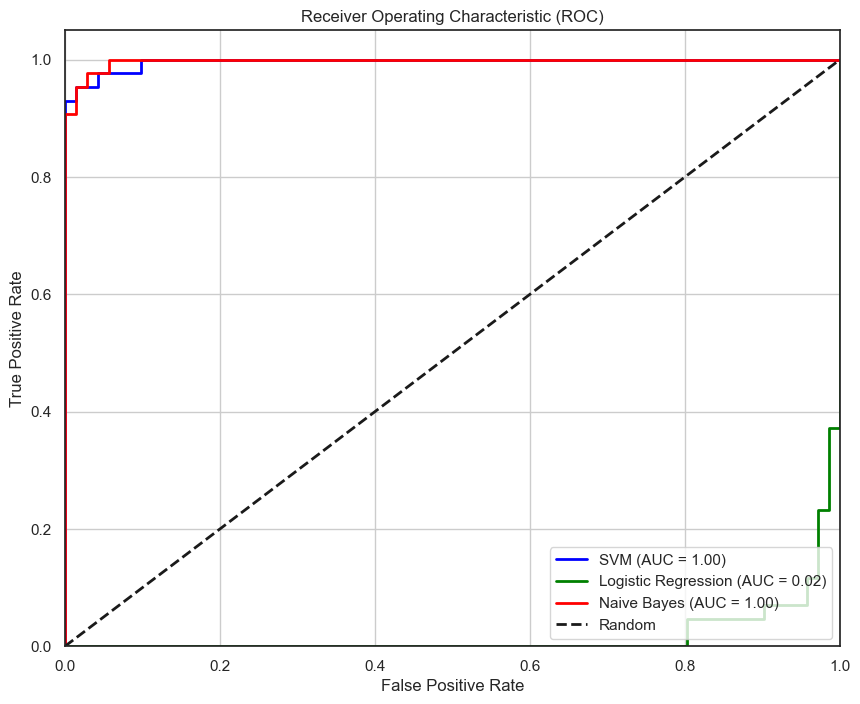

In [78]:
# Predict probabilities for the positive class (assuming class 1 is the positive class)


# Assuming y_test is the true labels
#y_test = np.array([1, 0, 1, 1, 0])  # Replace with your actual test labels

# Compute ROC curves
fpr_svm, tpr_svm, _ = roc_curve(y_test_1d, y_pp_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test_1d, y_pp_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test_1d, y_pp_nb)

# Compute AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()

### 7. [BONUS] Learning Curve

A learning curve compares the validation and training performance of an estimator for varying amounts of training data. If both the validation and training score converge to a value that is too low, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [80]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [81]:
from sklearn.model_selection import learning_curve

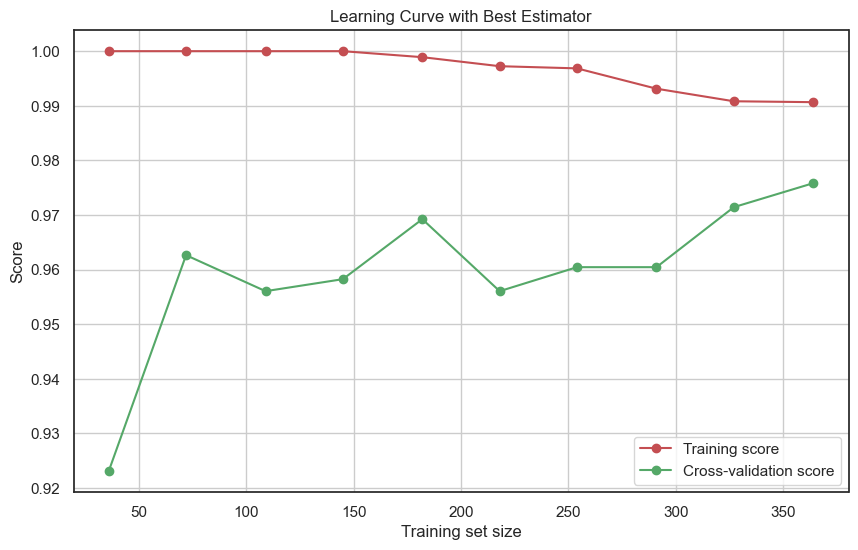

In [82]:
# Define the best model you obtained
model = best_log_reg

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPUs
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training sizes from 10% to 100%
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve with Best Estimator')
plt.legend(loc='best')
plt.grid()
plt.show()

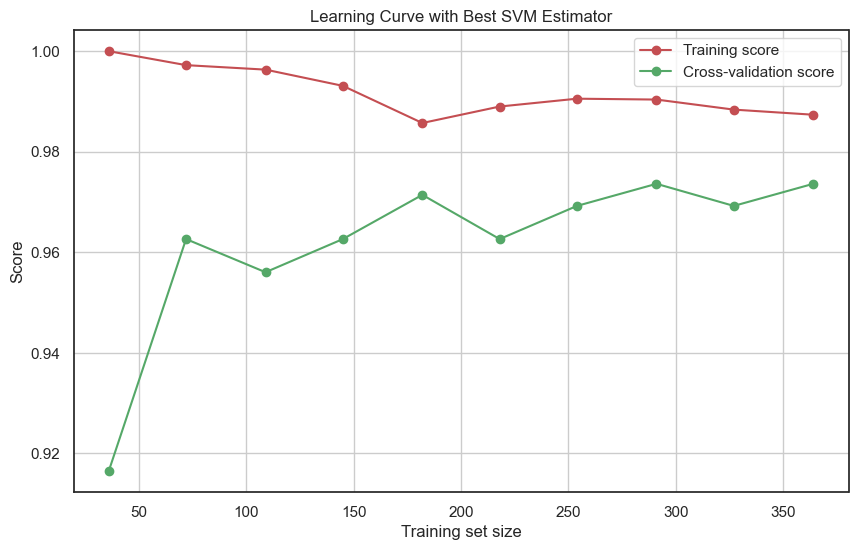

In [159]:
# Define the best SVM model obtained from GridSearchCV
model = best_svm

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPUs
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training sizes from 10% to 100%
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve with Best SVM Estimator')
plt.legend(loc='best')
plt.grid()
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



